##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</style></h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">LABORATORIUM 1</style></h1>
    <h1 style = "font-size:24px">z GŁĘBOKIEGO PRZETWARZANIA TEKSTU I MOWY</style></h1>
    <h1 style = "font-size:24px">Sygnały cyfrowe, reprezentacje, parametryzacje</style></h1>
    <h1 style = "font-size:24px">Przemysław Rośleń</style></h1>
    <h3 style = "font-size:21px">Reprezentacje sygnałów fonicznych - przykłady</h3>
    <h3 style =
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej"
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# 1. Przykład 2

W tym przykładzie skupiono się na rodzajach reprezentacji sygnałów fonicznych.
Poniżej pokazano w jaki sposób z wykorzystaniem biblioteki librosa można uzyskać spektrogram oraz melcepstrogram sygnału audio.
Jak przykładowe sygnały posłużą nagrania mowy wykonane w Katedrze Systemów Multimedialnych w ramach rejestracji korpusu ELRA-based sentence recordings.

Aby poprawnie uruchomić przykłady należy załadować zawartość folderu "dane" do usługi Colab lub umieścić w folderze z notatnikiem zawierającym przykład.

Najpierw dokonujemy załadowania bibliotek niezbędnych do uruchomienia ćwiczenia.

In [ ]:
import librosa
import librosa.display
import sklearn
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
%matplotlib inline

In [ ]:
!pip install spafe

!pip install python_speech_features
!pip install pydub
import spafe
import pydub
import python_speech_features

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5872 sha256=4c8ac43205d1704b3e3ef7460ef3cecca8822783c6360aa4342b1eb0f1ca8f0c
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


Po imporcie i instalacji bibliotek czas na pokazanie sposobu liczenia pierwszej reprezentacji czyli spektrogramu melowego zwanego melspektrogramem. Do tego celu zostanie wykorzystana biblioteka librosa. Jak przykład sygnału audio posłuży nagranie z korpusu ELRA-based sentence recordings.

[Text(0.5, 1.0, 'Melspektrogram')]

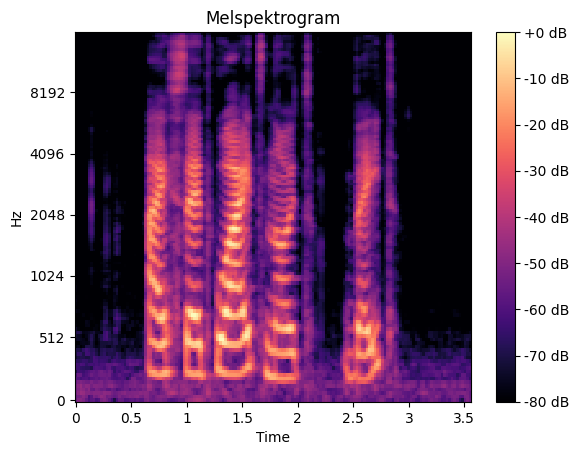

In [ ]:
signal, sample_rate = librosa.load("Speaker_6_001.wav")
signal = np.array(signal)
signal, index= librosa.effects.trim(signal)
mel_spec = librosa.feature.melspectrogram(y=signal, sr=sample_rate)
fig, ax = plt.subplots()

S_dB = librosa.power_to_db(mel_spec, ref=np.max)

img = librosa.display.specshow(S_dB, x_axis='time',

                         y_axis='mel', sr=sample_rate,

                         fmax=16000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Melspektrogram')

Otrzymany melspektrogram pokazuje w których momentach czasu w funkcji częstotliwości pojawia się dźwięk o natężeniu wyrażonym odpowiednim kolorem.

Przy użyciu bibliotek librosa możemy obliczyć również zwykły spektrogram. Znowu posłużymy się testowym nagraniem.

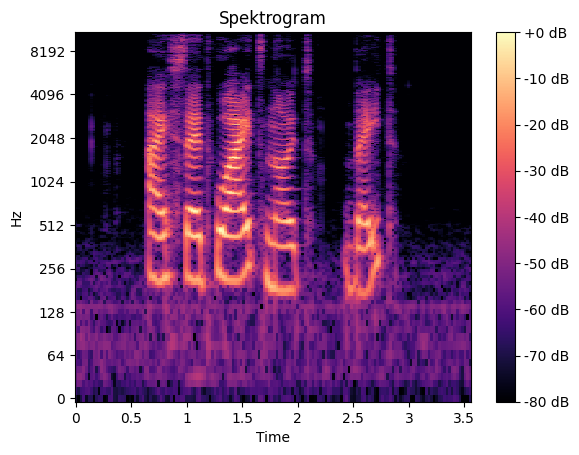

In [ ]:
signal, sample_rate = librosa.load("Speaker_6_001.wav")
S = np.abs(librosa.stft(signal)) # obliczanie stft, dalej wykorzystywana jest tylko część rzeczywista
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time', ax=ax)
ax.set_title('Spektrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

Za pomocą biblioteki librosa można również obliczyć reprezentację sygnału audio transformowanego z użyciem transformacji CQT. Jest to dosyć ciekawa transformacja, powiązana z transformacją Fouriera i transformacją falkową Gabora. Jej naistotniejszą cechą jest fakt iż naśladuje ludzki zmysł słuchu -  w rozdzielczości widmowej o niższej częstotliwości jest lepsza, podczas gdy czasowa rozdzielczość poprawia się przy wyższych częstotliwościach. Transformacja jest stosowania głównie do muzyki. W związku z tym wykorzystamy nagranie śpiewu.

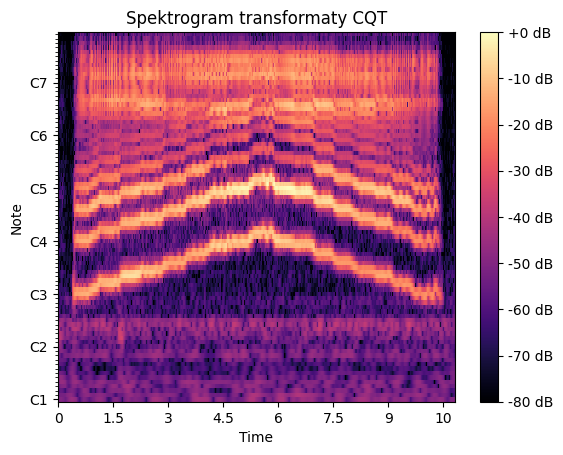

In [ ]:
import matplotlib.pyplot as plt
signal, sample_rate = librosa.load("m2_scales_straight_e.wav")
C = np.abs(librosa.cqt(signal, sr=sample_rate)) # obliczanie transformaty CQT
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sample_rate, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Spektrogram transformaty CQT')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

Jak widać w górnym paśmie widmo się zlewa. Można temu zapobiec stosując dodatkowe parametry w funkcji librosa.cqt.

<ipython-input-6-e9f9c8a28e9e>:4: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),


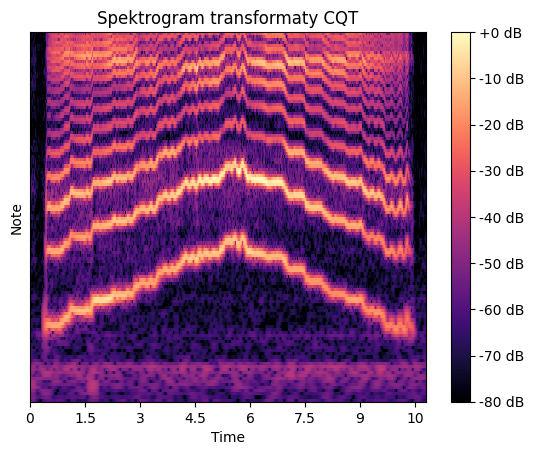

In [ ]:
C = np.abs(librosa.cqt(signal, sr=sample_rate, fmin=librosa.note_to_hz('C2'),
                n_bins=60 * 2, bins_per_octave=12 * 2)) # n_bins odpowiada za podział na przedziały - liczba przedziałów, do tego zastosowano 24 przedziały na oktawę
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sample_rate, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Spektrogram transformaty CQT')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

Wykorzystując bibliotekę spafe można w łatwy sposób uzyskać spektrogram

<ipython-input-7-0cdf8fa5e720>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, signal = scipy.io.wavfile.read("Speaker_6_001.wav")


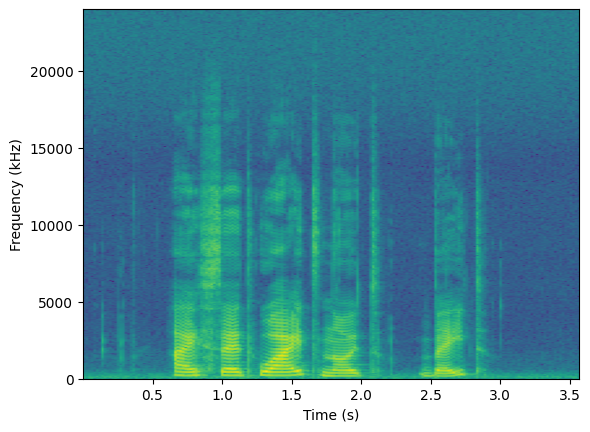

In [ ]:
import scipy
from spafe.utils import vis
from scipy.io import wavfile
import scipy.io

sample_rate, signal = scipy.io.wavfile.read("Speaker_6_001.wav")

def spectogram(sig, fs):
    """
    visualize a the spectogram of the given mono signal.

    Args:
        sig (array) : a mono audio signal (Nx1) from which to compute features.
        fs    (int) : the sampling frequency of the signal we are working with.
    """
    plt.specgram(sig, NFFT=1024, Fs=fs)
    plt.ylabel("Frequency (kHz)")
    plt.xlabel("Time (s)")
    plt.show(block=False)
    plt.close()

# Tworzenie spektrogramu
spectogram(signal, sample_rate)


<p><b>Zadanie 1</b></p>

Wykorzystując wybrane pliki z ćw. 1. i przykłady z notatnika obliczyć reprezentacje sygnałów i porównać je ze sobą  policzone dla plików z tą samą zawartością (mowa, muzyka, śpiew).
Opisać zaobserwowane różnice. Z czego mogą wynikać? Która reprezentacja najlepiej nadaje się dla danego typu zawartości?

<p><b>Zadanie 2</b></p>
Która z reprezentacji wydaje się być najbardziej przejrzysta i łatwa do odczytania dla człowieka, a która dla komputera? Uzasadnij odpowiedź na podstawie laboratorium.



Zadanie 1

Mowa

[Text(0.5, 1.0, 'Melspektrogram')]

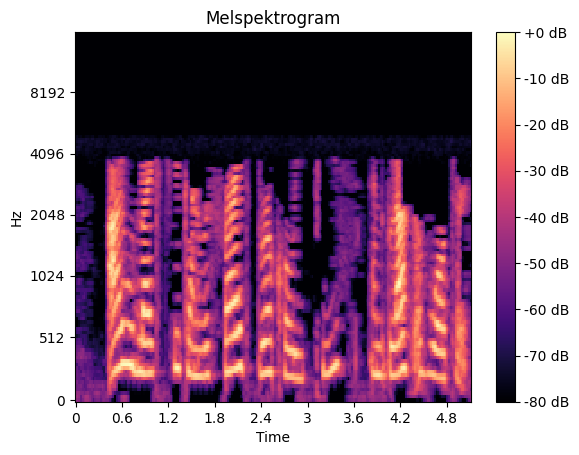

In [ ]:
signal, sample_rate = librosa.load("Speaker_8_153_8_wav.wav")
signal = np.array(signal)
signal, index= librosa.effects.trim(signal)
mel_spec = librosa.feature.melspectrogram(y=signal, sr=sample_rate)
fig, ax = plt.subplots()

S_dB = librosa.power_to_db(mel_spec, ref=np.max)

img = librosa.display.specshow(S_dB, x_axis='time',

                         y_axis='mel', sr=sample_rate,

                         fmax=16000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Melspektrogram')

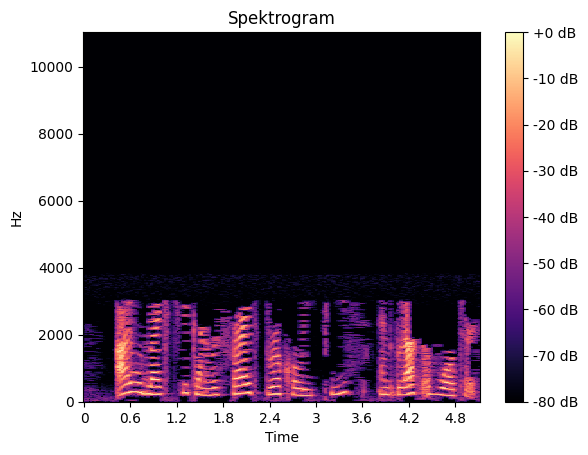

In [ ]:
signal, sample_rate = librosa.load("Speaker_8_153_8_wav.wav")
S = np.abs(librosa.stft(signal)) # obliczanie stft, dalej wykorzystywana jest tylko część rzeczywista
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='linear', x_axis='time', ax=ax)
ax.set_title('Spektrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

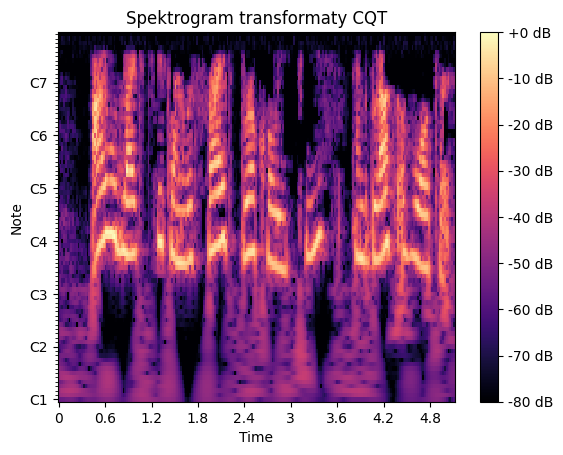

In [ ]:
import matplotlib.pyplot as plt
signal, sample_rate = librosa.load("Speaker_8_153_8_wav.wav")
C = np.abs(librosa.cqt(signal, sr=sample_rate)) # obliczanie transformaty CQT
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sample_rate, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Spektrogram transformaty CQT')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

W przypadku nagrania mowy widać dużą różnicę między reprezentacją melspektrogramową, a reprezentacjami spektrogramowymi. Na melspektrogramie widać bardziej stałe odległości między kolejnymi formantami na wykresie. Wynika to z logarytmicznej natury skali melowej. Poza tym wykresy te nie różnią się znacząco. Najczytelniejszy wydaje się melspektrogram, którego skala dostosowana jest do tego jak dźwięk rejestrowany jest przez ludzkie ucho.

Muzyka

[Text(0.5, 1.0, 'Melspektrogram')]

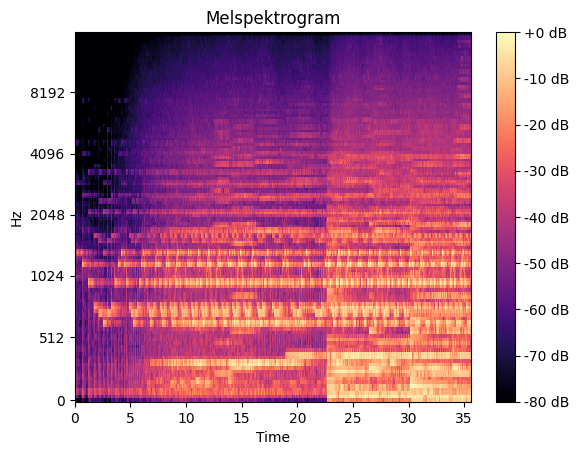

In [ ]:
signal, sample_rate = librosa.load("punch-deck-bittersweet.wav")
signal = np.array(signal)
signal, index= librosa.effects.trim(signal)
mel_spec = librosa.feature.melspectrogram(y=signal, sr=sample_rate)
fig, ax = plt.subplots()

S_dB = librosa.power_to_db(mel_spec, ref=np.max)

img = librosa.display.specshow(S_dB, x_axis='time',

                         y_axis='mel', sr=sample_rate,

                         fmax=16000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Melspektrogram')

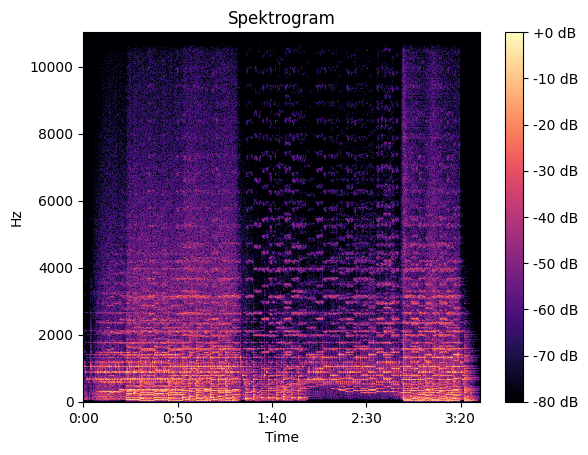

In [ ]:
signal, sample_rate = librosa.load("punch-deck-bittersweet.wav")
S = np.abs(librosa.stft(signal)) # obliczanie stft, dalej wykorzystywana jest tylko część rzeczywista
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='linear', x_axis='time', ax=ax)
ax.set_title('Spektrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

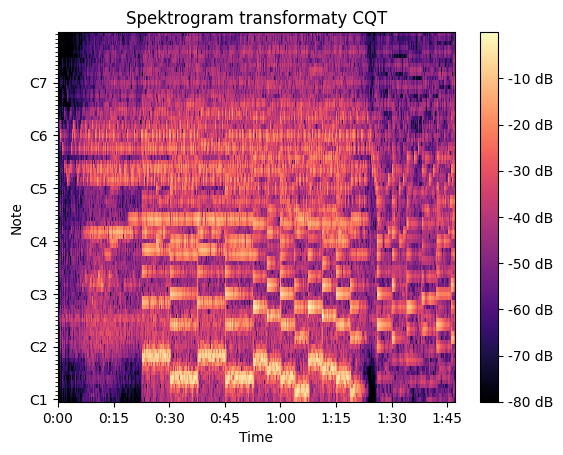

In [ ]:
import matplotlib.pyplot as plt
signal, sample_rate = librosa.load("punch-deck-bittersweet.wav")
C = np.abs(librosa.cqt(signal, sr=sample_rate)) # obliczanie transformaty CQT
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sample_rate, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Spektrogram transformaty CQT')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

W przypadku muzyki najbardziej czytelna dla człowieka jest reprezentacja spektrogramowa z wykorzystaniem transformaty CQT. Szczególnie, jeżeli ktoś posiada podstawową wiedzę muzyczną odnośnie dźwięków w muzyce, ponieważ na wykresie klarownie widać jakie dźwięki dominowały w utworze w kolejnych momentach czasu.

Wynika to z faktu, że nuty muzyczne są dla człowieka dobrym odniesieniem pozwalającym na zwizualizowanie sobie danego dźwięku w przeciwieństwie do wartości reprezentowanych w hercach.

Śpiew

[Text(0.5, 1.0, 'Melspektrogram')]

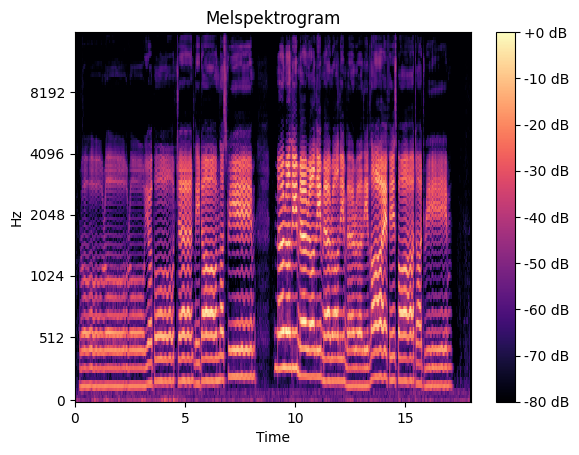

In [ ]:
signal, sample_rate = librosa.load("m2_row_straight.wav")
signal = np.array(signal)
signal, index= librosa.effects.trim(signal)
mel_spec = librosa.feature.melspectrogram(y=signal, sr=sample_rate)
fig, ax = plt.subplots()

S_dB = librosa.power_to_db(mel_spec, ref=np.max)

img = librosa.display.specshow(S_dB, x_axis='time',

                         y_axis='mel', sr=sample_rate,

                         fmax=16000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Melspektrogram')

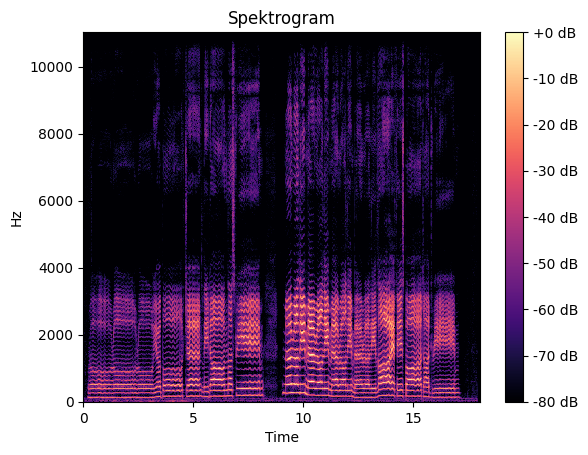

In [ ]:
signal, sample_rate = librosa.load("m2_row_straight.wav")
S = np.abs(librosa.stft(signal)) # obliczanie stft, dalej wykorzystywana jest tylko część rzeczywista
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='linear', x_axis='time', ax=ax)
ax.set_title('Spektrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

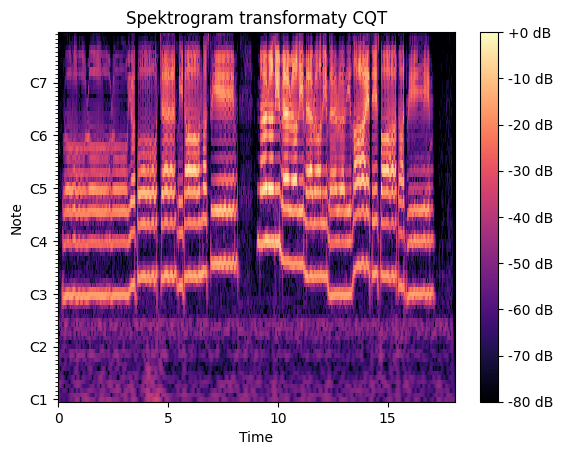

In [ ]:
import matplotlib.pyplot as plt
signal, sample_rate = librosa.load("m2_row_straight.wav")
C = np.abs(librosa.cqt(signal, sr=sample_rate)) # obliczanie transformaty CQT
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sample_rate, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Spektrogram transformaty CQT')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

W przypadku śpiewy, podobnie jak to było w przypadku muzyki, najbardziej czytelna dla człowieka jest reprezentacja spektrogramowa z wykorzystaniem transformaty CQT z uwagi na zastosowanie na osi częstotliwości muzycznej skali nutowej, z którą utożsamiamy śpiew.

Reprezentacja spektrogramowa jest najmniej czytelna z uwagi na wartościowanie częstotliwości w hercach oraz liniową naturę tej skali.


Zadanie 2

Człowiek

Podsumowując, na podstawie przykładów z niniejszego laboratorium najbardziej czytelna i zrozumiała dla człowieka w większości przypadków jest wizualizacja spektrogramowa z wykorzystaniem transformaty CQT, gdzie wartości na osi częstotliwości reprezentowane są przez nuty muzyczne. Szczególnie, gdy analizujemy audio o tematyce muzycznej (śpiew, gra na instrumentach)

Wynika to z faktu, że nuty muzyczne są dla człowieka dobrym odniesieniem pozwalającym na zwizualizowanie sobie danego dźwięku w przeciwieństwie do wartości reprezentowanych w hercach.



Komputer

Najbardziej przejrzysta dla komputera wydaje się być z kolei w większości przypadków reprezentacja melspektrogramowa. Dostarcza ona lepszej reprezentacji dla algorytmów, które chcą odzwierciedlić percepcję ludzkiego słuchu. Doskonałą skuteczność tej reprezentacji mieliśmy okazję zaobserwować wykonując ćwiczenie polegające na klasyfikacji nagrania do odpowiadających im mówców w pierwszym notatniku. Algorytm korzystający z współczynników MFCC, które są uzyskiwane z melspektrogramu osiągnął najwyższą dokładność równą niemal 98%.